In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os
os.chdir("/content/drive/MyDrive/COMP70058 Data_Updated/COMP70058 Data")
# os.chdir("/content/drive/MyDrive/Colab Notebooks/computer vision/CW/COMP70058 Data")
os.getcwd()

'/content/drive/MyDrive/COMP70058 Data_Updated/COMP70058 Data'

In [6]:
from matplotlib import pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import math



In [7]:
import numpy as np
np.set_printoptions(suppress=True)
from numpy.linalg import inv


(1080, 1920, 3)


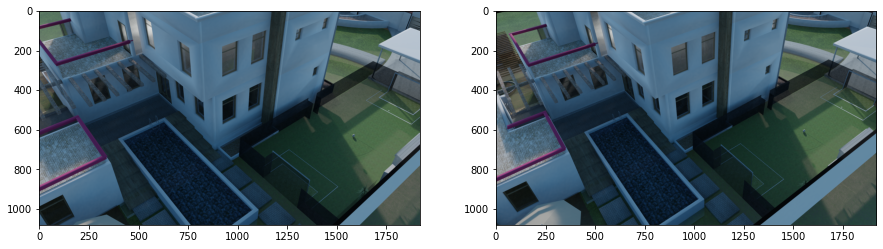

In [8]:
frame1 = cv2.imread('./Frame1.png')[:,:,[2,1,0]]
frame2 = cv2.imread('./Frame2.png')[:,:,[2,1,0]]
# cv2_imshow(frame1)
# cv2_imshow(frame2)
print(frame1.shape)
# im1 = cv2.imread('./img1.pgm', 0)
# im2 = cv2.imread('./img2.pgm', 0)
f, axs = plt.subplots(1,2,figsize=(15,15))
axs[0].imshow(frame1)
# axs[0].imshow(frame1, cmap='gray')
# axs[0].axis('off')
axs[1].imshow(frame2)
# axs[1].imshow(frame2, cmap='gray')
# axs[1].axis('off')


[[ 40  60 121 ... 128  70 185]
 [ 10  65  18 ...  46  41 141]
 [  3 142  97 ... 204 241 188]
 ...
 [216   4  79 ... 192 240  32]
 [ 32 193  17 ...  24 212 170]
 [136 224 153 ...  72 208 170]]
(< cv2.KeyPoint 0x7f14d859c270>, < cv2.KeyPoint 0x7f14d859c030>, < cv2.KeyPoint 0x7f14d8033060>, < cv2.KeyPoint 0x7f14d8033120>, < cv2.KeyPoint 0x7f14d80330c0>, < cv2.KeyPoint 0x7f14d80330f0>, < cv2.KeyPoint 0x7f14d8033150>, < cv2.KeyPoint 0x7f14d8033180>, < cv2.KeyPoint 0x7f14d80331b0>, < cv2.KeyPoint 0x7f14d80331e0>, < cv2.KeyPoint 0x7f14d8033210>, < cv2.KeyPoint 0x7f14d8033240>, < cv2.KeyPoint 0x7f14d8033270>, < cv2.KeyPoint 0x7f14d80332a0>, < cv2.KeyPoint 0x7f14d80332d0>, < cv2.KeyPoint 0x7f14d8033300>, < cv2.KeyPoint 0x7f14d8033330>, < cv2.KeyPoint 0x7f14d8033390>, < cv2.KeyPoint 0x7f14d8033360>, < cv2.KeyPoint 0x7f14d80333c0>, < cv2.KeyPoint 0x7f14d80333f0>, < cv2.KeyPoint 0x7f14d8033420>, < cv2.KeyPoint 0x7f14d8033450>, < cv2.KeyPoint 0x7f14d8033480>, < cv2.KeyPoint 0x7f14d80334b0>, < cv2.K

(-0.5, 1919.5, 1079.5, -0.5)

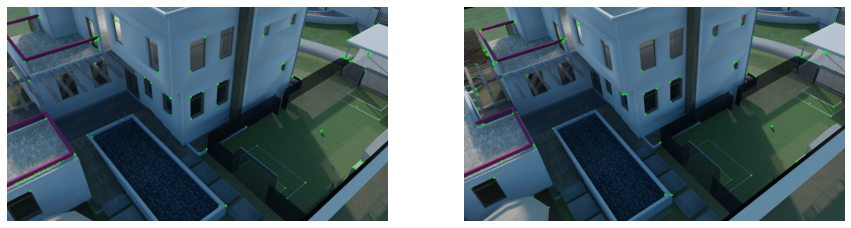

In [9]:
# Initiate ORB detector
orb = cv2.ORB_create()
# detect the key points and corresponding feature descriptor
kp_1, des_1 = orb.detectAndCompute(frame1, None)
kp_2, des_2 = orb.detectAndCompute(frame2, None)
print(des_1)
print(kp_1)
print(type(kp_1))
# draw the key points
im1_keypoints = cv2.drawKeypoints(frame1, kp_1, None, [0, 255, 0], flags=0)
im2_keypoints = cv2.drawKeypoints(frame2, kp_2, None, [0, 255, 0], flags=0)
f, axs = plt.subplots(1,2,figsize=(15,15))
axs[0].imshow(im1_keypoints)
axs[0].axis('off')
axs[1].imshow(im2_keypoints)
axs[1].axis('off')

(< cv2.DMatch 0x7f14d5d918f0>, < cv2.DMatch 0x7f14d5d91910>, < cv2.DMatch 0x7f14d801eef0>, < cv2.DMatch 0x7f14d5d4d910>, < cv2.DMatch 0x7f14d5d4d8f0>, < cv2.DMatch 0x7f14d5d4d850>, < cv2.DMatch 0x7f14d5d4d7b0>, < cv2.DMatch 0x7f14d5d4d430>, < cv2.DMatch 0x7f14d5d4d550>, < cv2.DMatch 0x7f14d5d4d390>, < cv2.DMatch 0x7f14d5d4d950>, < cv2.DMatch 0x7f14d5d4d730>, < cv2.DMatch 0x7f14d5d4d750>, < cv2.DMatch 0x7f14d5d4d710>, < cv2.DMatch 0x7f14d5d4d790>, < cv2.DMatch 0x7f14d5d4d0f0>, < cv2.DMatch 0x7f14d5d4da10>, < cv2.DMatch 0x7f14d5d4d330>, < cv2.DMatch 0x7f14d5d4d190>, < cv2.DMatch 0x7f14d5d4d9b0>, < cv2.DMatch 0x7f14d5d4d170>, < cv2.DMatch 0x7f14d5d4d9d0>, < cv2.DMatch 0x7f14d5d4d1d0>, < cv2.DMatch 0x7f14d5d4da50>, < cv2.DMatch 0x7f14d5d4d350>, < cv2.DMatch 0x7f14d5d4d2b0>, < cv2.DMatch 0x7f14d5d4d990>, < cv2.DMatch 0x7f14d5d4d310>, < cv2.DMatch 0x7f14d5d4d3d0>, < cv2.DMatch 0x7f14d5d4d3b0>, < cv2.DMatch 0x7f14d5d4d2f0>, < cv2.DMatch 0x7f14d5d4d770>, < cv2.DMatch 0x7f14d5d4d830>, < cv2.DMa

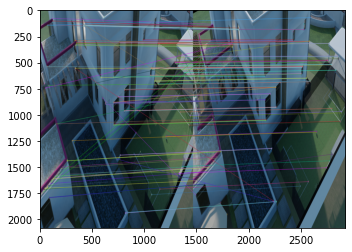

(<matplotlib.image.AxesImage at 0x7f14d5d0dc50>, None)

In [10]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des_1, des_2)
print(matches)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
print(matches[0])
# Draw all matches.
frame3 = cv2.drawMatches(frame1, kp_1, frame2, kp_2, matches[:2000], None)
# frame3 = cv2.resize(frame3, (1080,1920))
frame3 = cv2.resize(frame3, (2920,2080))

plt.imshow(frame3),plt.show()

In [ ]:
# print(kp_1)
# print(type(kp_1))

In [ ]:
# point_count = 100

# vector<Point2f> points1(point_count);
# vector<Point2f> points2(point_count);

# # initialize the points here ...
# for i in range(i):
#     points1[i] = ...;
#     points2[i] = ...;

#eg
# F, mask = cv2.findFundamentalMat(pixel_points1, pixel_points2, method=cv2.FM_RANSAC,ransacReprojThreshold=0.9, confidence=0.99)
# F, mask = cv2.findFundamentalMat(kp_1, kp_2, method=CV_FM_7POINT, param1=1., param2=0.99, status=None)

In [ ]:
kp_1[0].pt

(422.0, 180.0)

In [ ]:
# print(kp_1[0].pt)
# print(kp_2)
# print(len(kp_1), len(kp_2))

# pts1 = []
# pts2 = []
# for i in range(len(kp_1)):
#     # if m.distance < 20:
#     #print(m.distance)
#     pts2.append(kp_2[i].pt)
#     pts1.append(kp_1[i].pt)

# pts1 = np.asarray(pts1)
# pts2 = np.asarray(pts2)

# F, mask = cv2.findFundamentalMat(pts1, pts2, method=cv2.FM_RANSAC, ransacReprojThreshold=0.1, confidence=0.99)
# print(F)



In [11]:
# extract points
pts1 = []
pts2 = []
for i,(m) in enumerate(matches):
    if m.distance < 20:
        #print(m.distance)
        pts2.append(kp_2[m.trainIdx].pt)
        pts1.append(kp_1[m.queryIdx].pt)
pts1  = np.asarray(pts1)
pts2 = np.asarray(pts2)

match_array = np.concatenate((pts1,pts2),axis=1)
# Compute fundamental matrix
F, mask = cv2.findFundamentalMat(pts1,pts2,cv2.FM_8POINT)
F, mask = cv2.findFundamentalMat(pts1,pts2,cv2.FM_RANSAC)
print(F)

[[ 0.00000027 -0.00001819  0.00198085]
 [ 0.00002005  0.00000187 -0.03062953]
 [-0.00297161  0.02672448  1.        ]]


In [ ]:
# # github上项目
# from sys import ps1

# points1 = np.zeros((len(matches), 2), dtype=np.float32)
# points2 = np.zeros((len(matches), 2), dtype=np.float32)
# for i, (m) in enumerate(matches):
#     points1[i, :] = kp_1[m.queryIdx].pt
#     points2[i, :] = kp_2[m.trainIdx].pt

# def normalize(points):
#     """
#     @brief This function is used to normalize the points.
    
#     Args:
#         points: Points to be normalized
    
#     Returns:
#         points: Normalized points
#     """
#     points_mean = np.mean(points, axis=0)
#     u_m ,v_m = points_mean[0], points_mean[1]

#     u_ = points[:,0] - u_m
#     v_ = points[:,1] - v_m

#     s = (2/np.mean(u_**2 + v_**2))**(0.5)
#     T_ = np.diag([s,s,1])
#     trans = np.array([[1,0,-u_m],[0,1,-v_m],[0,0,1]])
#     T = T_.dot(trans)

#     x_ = np.column_stack((points, np.ones(len(points))))
#     norm_pts = (T.dot(x_.T)).T

#     return  norm_pts, T

# def get_fundamental_mat_zjdou(points1,points2):
#     """
#     @breif This function is used to get the fundamental matrix.
    
#     Args: 
#         points1 : First image feature points
#         points2 : Second image feature points
        
#     Returns:
#         F : Fundamental matrix
#     """
#     # Normalize the points
#     points1, T1 = normalize(points1)
#     points2, T2 = normalize(points2)
    
#     A = np.zeros((len(points1),9))
#     # Construct the matrix A
#     for i in range(len(points1)):
#         u_l,u_r = points1[i][0],points2[i][0]
#         v_l,v_r = points1[i][1],points2[i][1]
#         A[i] = np.array([u_l*u_r,u_l*v_r,u_l,v_l*u_r,v_l*v_r,v_l,u_r,v_r,1])
    
#     # A = np.matrix([[points1[i,0]*points2[i,0],points1[i,0]*points2[i,1],points1[i,0],points2[i,0]*points1[i,1],points1[i,1]*points2[i,1],
#     #              points1[i,1],points2[i,0],points2[i,1],1] for i in range(8)])
    
#     A = np.array(A)
    
#     U,S,V = np.linalg.svd(A)

#     F = V[-1,:].reshape(3, 3)
    
#     # We get the rank of F as 3 where as we need the rank of the F to be 2
#     # We need to make F rank 2 by zeroing out the last singular value of F
    
#     U_,S_,V_ = np.linalg.svd(F)
#     S_[2] = 0
#     s = np.zeros((3,3))
#     for i in range(3):
#         s[i,i] = S_[i]
#     F = np.dot(U_,np.dot(s,V_))
#     # Undo the normalization
#     F_ = np.dot(T2.T, np.dot(F, T1))
    
#     return F_

# # get_fundamental_mat_zjdou(pts1, pts2)
# def F_RANSAC(pts1,pts2):
#     """
#     @breif This function is used to get the best fundamental matrix using RANSAC.
    
#     Args:
#         pts1 : First image feature points
#         pts2 : Second image feature points
        
#     Returns:
#         F : Best fundamental matrix
#         inliers_img1 : Inliers in the first image
#         inliers_img2 : Inliers in the second image
#     """
    
#     points = np.concatenate((pts1,pts2),axis=1)
#     max_inliners = 0
#     thresh = 0.01 # Can be changed
    
#     for i in range(2000):
#         # Randomly select 8 points from the list of points
#         point = np.random.choice(points.shape[0],8,replace=False)
#         pts1_ = points[point,0:2]
#         pts2_ = points[point,2:4]
        
#         F_mat = get_fundamental_mat_zjdou(pts1_,pts2_)
    
       
#         inliers_img1 = []
#         inliers_img2 = []
        
#         for i in range(len(pts1)):
#             x_1 ,y_1 = pts1[i][0],pts1[i][1]
#             x_2 , y_2= pts2[i][0],pts2[i][1]
            
#             p1_ = np.array([x_1,y_1,1])
#             p2_ = np.array([x_2,y_2,1])
#             dist = np.abs(np.dot(p2_.T,np.dot(F_mat,p1_)))
            
#             if dist < thresh:
#                 inliers_img1.append(pts1[i])
#                 inliers_img2.append(pts2[i])
            
#         n_inliers = len(inliers_img1)
        
#         if n_inliers > max_inliners:
#             print("Found new max inliers: ",n_inliers)
#             max_inliners = n_inliers
#             F_mat_ = F_mat
#             inliers_img1_ = inliers_img1
#             inliers_img2_ = inliers_img2
            
#     return F_mat_, inliers_img1_, 
    
# match_array = np.concatenate((pts1, pts2),axis=1)

# F, _, = F_RANSAC(points1, points2)
# F

In [ ]:
# F, _, = cv2.findFundamentalMat(points1, points2, cv2.FM_8POINT)
# F

In [ ]:
K1 = np.array([[1.600e+03, 0.000e+00, 9.595e+02],
[0.000e+00, 1.600e+03, 5.395e+02],
[0.000e+00, 0.000e+00, 1.000e+00]])

R1 = np.array([[-6.32422984e-01, -7.74574101e-01, 8.72639567e-03, -2.36433081e+00],
[-5.00836670e-01, 4.00276423e-01, -7.67425179e-01, -1.74806440e+00],
[ 5.90934694e-01, -4.89707828e-01, -6.41079128e-01, 2.59576015e+01],
[ 0., 0., 0., 1.]])

K2 = np.array([[1.49333333e+03, 0.00000000e+00, 9.78700000e+02],
[0.00000000e+00, 1.49333333e+03, 5.20300000e+02],
[0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

R2 = np.array([[-0.5845883, -0.81050003, -0.03669427, -2.39520617],
[-0.5041514, 0.39832053, -0.76627171, -1.79913743],
[ 0.6356793, -0.42945388, -0.64146805, 26.26804151],
[ 0., 0., 0., 1.]])


D1= np.array([0.0, 0.0, 0.0, 0.0, 0.0])
D2= np.array([0.0, 0.0, 0.0, 0.0, 0.0])
R_vec = np.array([[ 0.9971792 , -0.00348069, 0.07497863],
[ 0.00362138, 0.99999203, -0.00174044],
[-0.07497205, 0.00200697, 0.99718366]])

T_vec = np.array([-1.98989457, 0.00265269, 0.20979508])

# function ret = computeF(K1, K2, R, t)
#   A = K1 * R' * t
#   C = [0 -A(3) A(2); A(3) 0 -A(1); -A(2) A(1) 0]
#   ret = (inverse(K2))' * R * K1' * C
# endfunction

In [ ]:

# def calc_F(k0, r0, t0, k1, r1, t1):
#     '''以第一个相机光心为世界原点，计算基础矩阵F'''
#     rr = r1 @ r0.T
#     tt = (t1 - rr @ t0)
#     st = np.float32([[0, -tt[2], tt[1]], [tt[2], 0, -tt[0]], [-tt[1], tt[0], 0]])
#     F = inv(k1).T @ st @ rr @ inv(k0)
#     return F

def calc_F(rr, tt, k1, k2):
    st = np.float32([[0, -tt[2], tt[1]], [tt[2], 0, -tt[0]], [-tt[1], tt[0], 0]])
    print(np.linalg.inv(k2).shape, st.shape, rr.shape, np.linalg.inv(k1).shape)
    F = np.linalg.inv(k2).T @ st @ rr @ np.linalg.inv(k1)
    return F

print(calc_F(R_vec, T_vec, K1, K2))


# function ret = computeF(K1, K2, R, t)
#   A = K1 * R' * t
#   C = [0 -A(3) A(2); A(3) 0 -A(1); -A(2) A(1) 0]
#   ret = (inverse(K2))' * R * K1' * C
# endfunction

(3, 3) (3, 3) (3, 3) (3, 3)
[[-0.         -0.00000009  0.00004977]
 [ 0.00000003  0.          0.00131446]
 [-0.00001883 -0.00115845 -0.05249279]]


In [ ]:
# def crossProductMatrix(t):
#     """Estimating the skew symmetric matrix."""  
#     return np.matrix([[0, -t[2], t[1]], 
#                      [t[2], 0, -t[0]],
#                      [-t[1], t[0], 0]])

# def calc_matrices(tvecs1, rvecs1, cameraMatrix1, cameraMatrix2):
#     skew_symmetric_matrix1 = crossProductMatrix(tvecs1) # This is not correct...
#     essential_matrix = skew_symmetric_matrix1 * np.matrix(cv2.Rodrigues(np.array(rvecs1))[0]) # A_x * R
#     print(essential_matrix)
#     fundamental_matrix = np.matrix(cameraMatrix2).T.I * essential_matrix * np.matrix(cameraMatrix1).I # K2^-T * E * K1^-1    
#     print(essential_matrix)
#     print(fundamental_matrix)   

# calc_matrices(T_vec, R_vec, K1, K2)


In [ ]:
def filter_matches_epipolar_constraint(F, matches, thresh):
    """
    Discards matches that are not consistent with the epipolar constraint.
    Args:
        F: fundamental matrix
        matches: list of pairs of 2D points, stored as a Nx4 numpy array
        thresh: maximum accepted distance between a point and its matched
            epipolar line
    Returns:
        the list of matches that satisfy the constraint. It is a sub-list of
        the input list.
    """
    out = []
    for match in matches:
        x = np.array([match[0], match[1], 1])
        xx = np.array([match[2], match[3], 1])
        d1 = distance_point_to_line(x, np.dot(F.T, xx))
        d2 = distance_point_to_line(xx, np.dot(F, x))
        if max(d1, d2) < thresh:
            out.append(match)

    return np.array(out)

In [ ]:
def distance_point_to_line(x, l):
    """
    Computes the distance between a point and a line expressed in homogeneous
    coordinates.
    Args:
        x: 3-vector, containing the homogeneous coordinates of a point
        l: 3-vector, containing the homogeneous coordinates of a line
    Returns:
        the distance between x and l
        In the case where x is an ideal point or l is the line at infinity, the
        returned distance is infinity
    """
    if (np.abs(x[2]) < np.finfo(float).eps):
        # x is an ideal point, distance is +infty
        return np.finfo(float).max
    if (np.hypot(l[0], l[1]) < np.finfo(float).eps):
        # l is the line at infinity, distance is +infty
        return np.finfo(float).max

    num = np.abs(np.dot(x, l))
    den = np.hypot(l[0], l[1]) * np.abs(x[2])
    return num/den

In [ ]:
thresh = 3
match_out = filter_matches_epipolar_constraint(F, match_array, thresh)
# cv_kpts1 =tuple([cv2.KeyPoint(match_out[i][0], match_out[i][1], 1)  for i in range(match_out.shape[0])])
# print(type(cv_kpts1))
# cv_kpts2 =tuple( [cv2.KeyPoint(match_out[i][2], match_out[i][3], 1)  for i in range(match_out.shape[0])])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for addi

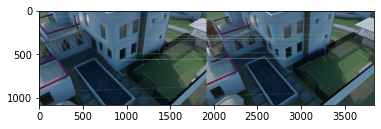

(<matplotlib.image.AxesImage at 0x7f4d8be716d0>, None)

In [ ]:
import cv2
import random
import numpy as np


def draw_match(src, dst, src_point, dst_point, number=20):
    """
    draw matching lines between two images
    :param src: image 1
    :param dst: image 2
    :param src_point: matching point on image 1
    :param dst_point: matching point on image 2
    :param number: # of matching line
    :return: Drawn image
    """
    src_point = src_point.astype(np.int)
    dst_point = dst_point.astype(np.int)
    src_h, src_w, _ = src.shape
    dst_h, dst_w, _ = dst.shape
    final_height = max(src_h, dst_h)
    final_width = src_w + dst_w

    # copy
    pic = np.zeros([final_height, final_width, 3], dtype=np.uint8)
    pic[:src_h, :src_w, :] = src[:, :, :]
    pic[:dst_h, src_w:, :] = dst[:, :, :]

    # give destination offset
    dst_point[:, 0] = dst_point[:, 0] + src_w

    # # matching #
    # n = src_point.shape[0]
    # if number > n:
    #     number = n

    # matching line draw
    for i in range(src_point.shape[0]):
        cv2.line(pic, (src_point[i, 0], src_point[i, 1]), (dst_point[i, 0], dst_point[i, 1]),
                 (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)), thickness=1, lineType=cv2.LINE_AA)
    return pic
src_point = match_out[:,(0,1)]
# print(src_point)
dst_point = match_out[:,(2,3)]
# print(dst_point)
pic = draw_match(frame1, frame2, src_point, dst_point, number=20)
plt.imshow(pic),plt.show()


In [ ]:
# https://github.com/JaeWangL/csp/tree/27b9953db0c77cfde634bc8dc504cbed6908ed32/merging/src/shared/utils

In [ ]:
# M, mask = cv2.findHomography(src_point, dst_point, cv2.RANSAC,5.0)[0]

H= cv2.findHomography(src_point, dst_point)[0]
print(H)
#                       figsize=(30,20), rotation=0, translation=0, max_distance=1e4):

[[  0.80790047  -0.07473929 120.52810057]
 [ -0.02506033   0.82321728  48.41167487]
 [ -0.00006473  -0.00005321   1.        ]]


In [ ]:
# import cv2

# def estimate_depth(img_left, img_right, show=True):
#     # 读取左右两张图像
#     # img_left = cv2.imread(left_path, 0)
#     # img_right = cv2.imread(right_path, 0)
#     height, width = img_left.shape[:2]

#     # 初始化stereo block match对象
#     stereo = cv2.StereoBM_create(numDisparities=16, blockSize=15)

#     # 获取视差图
#     disparity = stereo.compute(img_left, img_right)

#     if show:
#         # 将视差图归一化
#         # min_val = disparity.min()
#         # max_val = disparity.max()
#         # disparity = np.uint8(6400 * (disparity - min_val) / (max_val - min_val))

#         # 显示视差图
#         cv2.imshow('disparity image', disparity)
#         cv2.imwrite('disparity.jpg', disparity)
#         cv2.waitKey(0)
# estimate_depth(frame1,frame2)


error: ignored

In [ ]:
import numpy as np
import cv2


def find_homography(UV, XYZ, K, distortion=np.zeros((1,4)), z=0):
    '''Find homography based on ground control points
    Parameters
    ----------
    UV : np.ndarray
        Nx2 array of image coordinates of gcp's
    XYZ : np.ndarray
        Nx3 array of real-world coordinates of gcp's
    K : np.ndarray
        3x3 array containing camera matrix
    distortion : np.ndarray, optional
        1xP array with distortion coefficients with P = 4, 5 or 8
    z : float, optional
        Real-world elevation on which the image should be projected
    Returns
    -------
    np.ndarray
        3x3 homography matrix
    Notes
    -----
    Function uses the OpenCV image rectification workflow as described in
    http://docs.opencv.org/modules/calib3d/doc/camera_calibration_and_3d_reconstruction.html
    starting with solvePnP.
    Examples
    --------
    >>> camera_id = 4
    >>> r = argus2.rest.get_rectification_data('kijkduin')
    >>> H = flamingo.rectification.find_homography(r[camera_id]['UV'],
                                                   r[camera_id]['XYZ'],
                                                   r[camera_id]['K'])
    '''

    UV = np.asarray(UV).astype(np.float32)
    XYZ = np.asarray(XYZ).astype(np.float32)
    K = np.asarray(K).astype(np.float32)
    
    # compute camera pose
    rvec, tvec = cv2.solvePnP(XYZ, UV, K, distortion)[-2:]
    
    # convert rotation vector to rotation matrix
    R = cv2.Rodrigues(rvec)[0]
    
    # assume height of projection plane
    R[:,2] = R[:,2] * z

    # add translation vector
    R[:,2] = R[:,2] + tvec.flatten()

    # compute homography
    H = np.linalg.inv(np.dot(K, R))

    # normalize homography
    H = H / H[-1,-1]

    return H


def get_pixel_coordinates(img):
    '''Get pixel coordinates given an image
    Parameters
    ----------
    img : np.ndarray
        NxMx1 or NxMx3 image matrix
    Returns
    -------
    np.ndarray
        NxM matrix containing u-coordinates
    np.ndarray
        NxM matrix containing v-coordinates
    '''

    # get pixel coordinates
    U, V = np.meshgrid(range(img.shape[1]),
                       range(img.shape[0]))

    return U, V


def rectify_image(img, H):
    '''Get projection of image pixels in real-world coordinates
       given an image and homography
    Parameters
    ----------
    img : np.ndarray
        NxMx1 or NxMx3 image matrix
    H : np.ndarray
        3x3 homography matrix
    Returns
    -------
    np.ndarray
        NxM matrix containing real-world x-coordinates
    np.ndarray
        NxM matrix containing real-world y-coordinates
    '''

    U, V = get_pixel_coordinates(img)
    X, Y = rectify_coordinates(U, V, H)

    return X, Y


def rectify_coordinates(U, V, H):
    '''Get projection of image pixels in real-world coordinates
       given image coordinate matrices and  homography
    Parameters
    ----------
    U : np.ndarray
        NxM matrix containing u-coordinates
    V : np.ndarray
        NxM matrix containing v-coordinates
    H : np.ndarray
        3x3 homography matrix
    Returns
    -------
    np.ndarray
        NxM matrix containing real-world x-coordinates
    np.ndarray
        NxM matrix containing real-world y-coordinates
    '''

    UV = np.vstack((U.flatten(),
                    V.flatten())).T

    # transform image using homography
    XY = cv2.perspectiveTransform(np.asarray([UV]).astype(np.float32), H)[0]
    
    # reshape pixel coordinates back to image size
    X = XY[:,0].reshape(U.shape[:2])
    Y = XY[:,1].reshape(V.shape[:2])

    return X, Y

In [ ]:
U, V = get_pixel_coordinates(frame1)
X, Y = rectify_coordinates(U, V, H)

print(X.shape)

(1080, 1920)


In [ ]:
print(Y.shape)

(1080, 1920)


In [ ]:
X

array([[ 120.5281  ,  121.34386 ,  122.15971 , ..., 1905.7589  ,
        1906.8221  , 1907.8856  ],
       [ 120.45977 ,  121.275566,  122.09147 , ..., 1905.7893  ,
        1906.8527  , 1907.9161  ],
       [ 120.39143 ,  121.20727 ,  122.02321 , ..., 1905.8197  ,
        1906.8832  , 1907.9468  ],
       ...,
       [  42.46761 ,   43.3276  ,   44.187706, ..., 1940.8438  ,
        1941.9843  , 1943.1249  ],
       [  42.39072 ,   43.25075 ,   44.1109  , ..., 1940.8785  ,
        1942.0192  , 1943.1599  ],
       [  42.31382 ,   43.173897,   44.03409 , ..., 1940.9135  ,
        1942.0541  , 1943.195   ]], dtype=float32)

In [ ]:
Y

array([[  48.411674  ,   48.389748  ,   48.367817  , ...,    0.4235774 ,
           0.39499596,    0.3664103 ],
       [  49.23751   ,   49.215637  ,   49.193756  , ...,    1.3635025 ,
           1.3349888 ,    1.3064709 ],
       [  50.06344   ,   50.041615  ,   50.019787  , ...,    2.303542  ,
           2.275096  ,    2.2466457 ],
       ...,
       [ 991.85785   ,  991.89935   ,  991.94086   , ..., 1083.525     ,
        1083.5801    , 1083.6351    ],
       [ 992.7871    ,  992.82874   ,  992.8703    , ..., 1084.6011    ,
        1084.6562    , 1084.7114    ],
       [ 993.71655   ,  993.7582    ,  993.79987   , ..., 1085.6774    ,
        1085.7327    , 1085.788     ]], dtype=float32)

In [ ]:
frame1

array([[[ 76, 103,  92],
        [ 77, 104,  91],
        [ 83, 111,  96],
        ...,
        [ 84, 113, 137],
        [ 84, 113, 137],
        [ 83, 112, 136]],

       [[ 84, 112,  93],
        [ 87, 117,  95],
        [ 79, 107,  92],
        ...,
        [ 84, 113, 137],
        [ 85, 114, 137],
        [ 84, 113, 137]],

       [[ 89, 119,  95],
        [ 89, 119,  98],
        [ 82, 112,  93],
        ...,
        [ 84, 113, 137],
        [ 85, 114, 137],
        [ 84, 113, 136]],

       ...,

       [[ 62,  96, 125],
        [ 64,  97, 126],
        [ 63,  97, 126],
        ...,
        [ 38,  62,  60],
        [ 40,  62,  62],
        [ 41,  62,  64]],

       [[ 63,  96, 125],
        [ 64,  97, 126],
        [ 65,  98, 126],
        ...,
        [ 37,  62,  58],
        [ 38,  61,  61],
        [ 40,  62,  62]],

       [[ 65,  98, 126],
        [ 67,  99, 127],
        [ 66,  98, 127],
        ...,
        [ 38,  61,  59],
        [ 36,  60,  58],
        [ 33,  59,  56]]

In [ ]:
print(os.getcwd())
!python3 ./tesy.py

/content/drive/MyDrive/COMP70058 Data_Updated/COMP70058 Data
hello
